# Exploratory Data Analysis for an Online Retail Data

## Step 1: Importing necessary Libraries

In [1]:
# import pytho modules for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Step 2: Loading the Dataset.
* We use the [online_retail_data_without_null_values.csv](https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Python-Modules-for-Data-Analysis/Pandas-Module/How-to-Handle-Missing-Data-in-Pandas-DataFrame/online_retail_data_without_null_values.csv) dataset which was generated after removing raws with Null values from [Online Retail Store](https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Datasets/Online_Retail.csv) dataset.

In [31]:
url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Python-Modules-for-Data-Analysis/Pandas-Module/How-to-Filter-Pandas-DataFrame/online_retail_data_without_negative_qty_values.csv"
online_retail_data = pd.read_csv(url, encoding= 'unicode_escape', parse_dates=['InvoiceDate'])

## Step 3: Viewing the dataset.
We can quickly find out how many rows and columns there are in our dataset by using the shape method. This returns a tuple which contains the number of rows and columns.

Shape of the data

In [32]:
# number of columns and rows
online_retail_data.shape

(397924, 8)

Previewing the Dataset

In [33]:
online_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Additional Columns
* Add some extra columns from the preview above.
  
  1. Add __TotalAmount = Quantity * UnitPrice__
  2. Add __Date__ extracted from __InvoiceDate__ datetime column

In [34]:
# add TotalAmount Column
online_retail_data['TotalAmount'] = online_retail_data['Quantity'] * online_retail_data['UnitPrice']

# add Date Column
online_retail_data['Date'] = online_retail_data['InvoiceDate'].dt.date

In [35]:
online_retail_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01


#### Getting Columns names

In [36]:
online_retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'Date'],
      dtype='object')

#### Getting Concise info of dataset

In [37]:
# Basic Information about the data
online_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalAmount  397924 non-null  float64       
 9   Date         397924 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 30.4+ MB


#### Check the columns Data Types

In [38]:
online_retail_data.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
Date                   object
dtype: object

### Change the CustomerID column from float64 to object

In [39]:
## using dictionary to convert specific columns
convert_dic = {
    'CustomerID': str
}
online_retail_data = online_retail_data.astype(convert_dic)

#### Getting the Descriptive statistics.

In [40]:
# Describe the data - descriptive statistics
online_retail_data.describe(include='all', datetime_is_numeric=True)
# Specifying datetime_is_numeric=True adopts the future behavior of Treating datetime data as categorical rather than numeric in `.describe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date
count,397924.000000,397924,397924,397924.000000,397924,397924.000000,397924,397924,397924.000000,397924
unique,NaN,3665,3877,NaN,NaN,NaN,4339,37,NaN,305
top,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841.0,United Kingdom,NaN,2011-11-06
freq,NaN,2035,2028,NaN,NaN,NaN,7847,354345,NaN,3423
mean,560617.126645,NaN,NaN,13.021823,2011-07-10 23:43:36.912475648,3.116174,NaN,NaN,22.394749,NaN
min,536365.000000,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,NaN,NaN,0.000000,NaN
25%,549234.000000,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,NaN,NaN,4.680000,NaN
50%,561893.000000,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,NaN,NaN,11.800000,NaN
75%,572090.000000,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,NaN,NaN,19.800000,NaN
max,581587.000000,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,NaN,NaN,168469.600000,NaN


#### Checking Duplicates
* The pandas.DataFrame.duplicated.sum() function returns a Series or DataFrame containing the sum of the boolean values (True or False) in the duplicate rows of the DataFrame.

In [41]:
online_retail_data.duplicated().sum()

5192

### Checking Unique Values

In [42]:
# unique values of Country
print(online_retail_data['Country'].nunique())
online_retail_data['Country'].unique()

37


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

## Grouping the DataFrame

#### Grouping Data 1: Group By CustomerID

In [44]:
# group the data using CustomerID, Date and Country
grouped_daily_customer_data = online_retail_data.groupby(['CustomerID', 'Date', 'Country']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfUniqueInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique')
).reset_index()

In [45]:
# save results in a csv file
grouped_daily_customer_data.to_csv("grouped_daily_customer_data.csv", date_format='%Y-%m-%d')

#### Grouping Data 2: Group Data By Country
* __Goals__:
  * Calculate __Average Sales Value__ per Country.

In [46]:
# group the data by country and understand the summary data by Country
grouped_country_data = online_retail_data.groupby( 'Country').agg(
    CountOfUniqueCustomers = pd.NamedAgg(column = 'CustomerID', aggfunc = 'nunique'),
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfUniqueInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique')
).reset_index()

In [47]:
# calculate the Average Basket Value 
grouped_country_data['AverageSalesValue'] = grouped_country_data['TotalAmount'] / grouped_country_data['CountOfUniqueCustomers']

# save the output in a csv file
grouped_country_data.to_csv("grouped_country_data.csv")

## Analyzing the Data

### Univariate Analysis

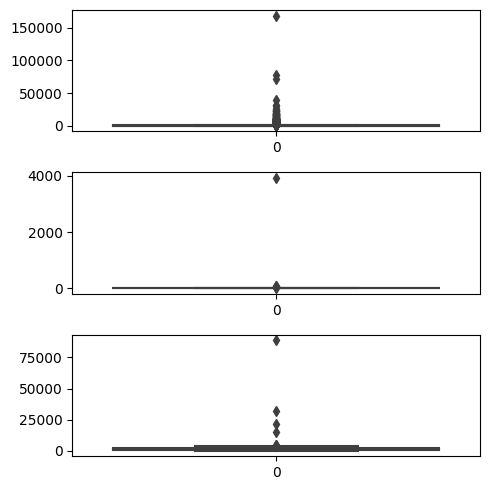

In [48]:
# handling outliers
fig, axs = plt.subplots(3, figsize = (5, 5))
plt1 = sns.boxplot(grouped_daily_customer_data['TotalAmount'], ax = axs[0])
plt2 = sns.boxplot(grouped_country_data['CountOfUniqueCustomers'], ax = axs[1])
plt3 = sns.boxplot(grouped_country_data['AverageSalesValue'], ax = axs[2])

plt.tight_layout()